In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 680)
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
chicago = pd.read_csv(("Chicago_Traffic_Crashes_-_Crashes.csv"))

C:\Users\ilang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358035 entries, 0 to 358034
Data columns (total 48 columns):
RD_NO                            358035 non-null object
CRASH_DATE_EST_I                 26674 non-null object
CRASH_DATE                       358035 non-null object
POSTED_SPEED_LIMIT               358035 non-null int64
TRAFFIC_CONTROL_DEVICE           358035 non-null object
DEVICE_CONDITION                 358035 non-null object
WEATHER_CONDITION                358035 non-null object
LIGHTING_CONDITION               358035 non-null object
FIRST_CRASH_TYPE                 358035 non-null object
TRAFFICWAY_TYPE                  358035 non-null object
LANE_CNT                         198545 non-null object
ALIGNMENT                        358035 non-null object
ROADWAY_SURFACE_COND             358035 non-null object
ROAD_DEFECT                      358035 non-null object
REPORT_TYPE                      349860 non-null object
CRASH_TYPE                       358035 non-null ob

# Basic Exploration

In [4]:
chicago.CRASH_TYPE.value_counts()

NO INJURY / DRIVE AWAY              277114
INJURY AND / OR TOW DUE TO CRASH     80921
Name: CRASH_TYPE, dtype: int64

In [5]:
chicago.DAMAGE.value_counts()

OVER $1,500      201348
$501 - $1,500    108499
$500 OR LESS      48188
Name: DAMAGE, dtype: int64

In [6]:
chicago.ROADWAY_SURFACE_COND.value_counts()

DRY                268289
WET                 50234
UNKNOWN             23392
SNOW OR SLUSH       12406
ICE                  2696
OTHER                 840
SAND, MUD, DIRT       178
Name: ROADWAY_SURFACE_COND, dtype: int64

In [7]:
chicago.WEATHER_CONDITION.value_counts()

CLEAR                     283026
RAIN                       33500
UNKNOWN                    15400
SNOW                       12680
CLOUDY/OVERCAST            10829
OTHER                       1120
FOG/SMOKE/HAZE               673
SLEET/HAIL                   582
FREEZING RAIN/DRIZZLE        136
SEVERE CROSS WIND GATE        77
BLOWING SNOW                  12
Name: WEATHER_CONDITION, dtype: int64

In [8]:
chicago.WORK_ZONE_I.value_counts()

Y    2052
N     527
Name: WORK_ZONE_I, dtype: int64

In [9]:
chicago.WORK_ZONE_TYPE.value_counts()

CONSTRUCTION    1466
UNKNOWN          269
MAINTENANCE      202
UTILITY          115
Name: WORK_ZONE_TYPE, dtype: int64

In [10]:
chicago.WORKERS_PRESENT_I.value_counts()

Y    540
N     60
Name: WORKERS_PRESENT_I, dtype: int64

In [11]:
chicago.columns

Index(['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE

# Data Cleaning

**Columns Dropped** - included administrative police notes, Lat/Long Location, and other features where the majority of values were **Nan**

**NaN Values**  - DOORING_I, if an accident didn't involving opening a door into a bicyclist, then the value should be NO rather than NaN, and was converted.  Applied this to several other columns where NaN should be No.  For numerical columns, NaN was changed to **0**  

**Outliers** - Included POSTED_SPEED_LIMIT, where values did not match Chicago speed limits of 15/20/25/35/45/55/65/70.  Values were changed to the nearest speed limit.  


In [12]:
to_drop = ['RD_NO', 
           'CRASH_DATE_EST_I',
           'REPORT_TYPE', 
           'DATE_POLICE_NOTIFIED',
           'DATE_POLICE_NOTIFIED', 
           'PHOTOS_TAKEN_I', 
           'STATEMENTS_TAKEN_I', 
           'LATITUDE',
           'LONGITUDE', 
           'LOCATION', 
           'WORK_ZONE_I', 
           'WORK_ZONE_TYPE', 
           'WORKERS_PRESENT_I', 
           'LANE_CNT', 
           'INJURIES_UNKNOWN']

chicago.drop(to_drop, inplace=True, axis=1)



In [13]:
chicago.POSTED_SPEED_LIMIT.unique()

array([45, 30, 25, 20, 10, 35, 15, 40,  0,  5, 55, 39,  9,  6,  3,  1, 50,
       60, 99, 65, 38, 18, 32,  2, 33, 12,  7, 63, 16, 34, 26,  4, 24, 23,
       70, 36, 22, 14, 11], dtype=int64)

In [14]:
chicago.POSTED_SPEED_LIMIT.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], 15, inplace=True) 
#Replacing all speed limit values <15 miles with 15

In [15]:
chicago.POSTED_SPEED_LIMIT.replace([16,18], 20, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([22,23,24], 25, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([26], 30, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([32,33,34], 35, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([36,38,39,40], 45, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([16,18], 20, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([50], 55, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([16,18], 20, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([60,63], 65, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([99], 70, inplace=True)

In [16]:
chicago.POSTED_SPEED_LIMIT.value_counts()

30    264421
15     28699
35     24293
25     21242
20     13508
45      5367
55       406
70        69
65        30
Name: POSTED_SPEED_LIMIT, dtype: int64

In [17]:
chicago.isnull().sum()*100/chicago.isnull().count()

CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
DEVICE_CONDITION                  0.000000
WEATHER_CONDITION                 0.000000
LIGHTING_CONDITION                0.000000
FIRST_CRASH_TYPE                  0.000000
TRAFFICWAY_TYPE                   0.000000
ALIGNMENT                         0.000000
ROADWAY_SURFACE_COND              0.000000
ROAD_DEFECT                       0.000000
CRASH_TYPE                        0.000000
INTERSECTION_RELATED_I           78.038739
NOT_RIGHT_OF_WAY_I               95.374475
HIT_AND_RUN_I                    72.275616
DAMAGE                            0.000000
PRIM_CONTRIBUTORY_CAUSE           0.000000
SEC_CONTRIBUTORY_CAUSE            0.000000
STREET_NO                         0.000000
STREET_DIRECTION                  0.000559
STREET_NAME                       0.000279
BEAT_OF_OCCURRENCE                0.001117
DOORING_I                        99.655341
NUM_UNITS  

In [18]:
chicago.DOORING_I.replace(np.nan, 'N', inplace=True) 
chicago.HIT_AND_RUN_I.replace(np.nan, 'N', inplace=True) 
chicago.INTERSECTION_RELATED_I.replace(np.nan, 'N', inplace=True)
chicago.NOT_RIGHT_OF_WAY_I.replace(np.nan, 'N', inplace=True)
chicago.HIT_AND_RUN_I.replace(np.nan, 'N', inplace=True)
chicago.INJURIES_FATAL.replace(np.nan, 0, inplace=True)
chicago.INJURIES_TOTAL.replace(np.nan, 0, inplace=True)
chicago.INJURIES_INCAPACITATING.replace(np.nan, 0, inplace=True)
chicago.INJURIES_NON_INCAPACITATING.replace(np.nan, 0, inplace=True)
chicago.INJURIES_REPORTED_NOT_EVIDENT.replace(np.nan, 0, inplace=True)
chicago.INJURIES_NO_INDICATION.replace(np.nan, 0, inplace=True)
chicago.NUM_UNITS.replace(np.nan, 0, inplace=True)

## Now that data has been cleaned and features have been dropped, I added:

**IS FATAL** - Will tell the readers if a specific crash led to a fatality, this is a binary feature

**IS COSTLY** - Accidents that cost over $1,500 are considered **Costly**, and this binary feature will be our **Target Variable** .  

The ration of Costly:Not Costly is 56:44, so the class is fairly **balanced**

In [ ]:
#chicago.INJURIES_FATAL.unique()

# SVM Classifier.  
#Fatal or Not?  column.  

chicago["IS_FATAL"] = np.where(chicago.INJURIES_FATAL > 0, 1, 0)

chicago["IS_COSTLY"] = np.where(chicago.DAMAGE != 'OVER $1,500', 0, 1 )

In [ ]:
chicago.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,DOORING_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,IS_FATAL,IS_COSTLY
0,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,N,"OVER $1,500",FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,N,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,22,5,7,0,1
1,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,N,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,N,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,10,3,7,0,1
2,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,N,"$501 - $1,500",EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,N,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,17,7,8,0,0
3,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,Y,"$501 - $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,N,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,16,6,8,0,0
4,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,Y,"$501 - $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,N,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,16,7,8,0,0


In [ ]:
#Note the improvement in NaN value reduction
chicago.isnull().sum()*100/chicago.isnull().count()

CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
TRAFFICWAY_TYPE                  0.000000
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
CRASH_TYPE                       0.000000
INTERSECTION_RELATED_I           0.000000
NOT_RIGHT_OF_WAY_I               0.000000
HIT_AND_RUN_I                    0.000000
DAMAGE                           0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
SEC_CONTRIBUTORY_CAUSE           0.000000
STREET_NO                        0.000000
STREET_DIRECTION                 0.000559
STREET_NAME                      0.000279
BEAT_OF_OCCURRENCE               0.001117
DOORING_I                        0.000000
NUM_UNITS                        0

In [ ]:
#chicago.DAMAGE.value_counts()
chicago.CRASH_MONTH.value_counts()

10    38004
9     34946
8     32640
7     30982
5     30262
6     30254
11    29749
12    27546
3     27016
4     26942
1     25742
2     23952
Name: CRASH_MONTH, dtype: int64


# Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

In [ ]:
##What models should I consider? Start with Naive Bayes since I'm only doing classification

#Model evaluation techniques? 
#confusion matrix, precision, recall, false positives, true negatives, 

#What is explanatory vs predictive?
#Predict if an accident is costly or not
#Explain what contributing factors most likely lead to a costly accident, which categorical deata. 


Next, in order to prepare for your presentation, create a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

A specified research question your model addresses
How you chose your model specification and what alternatives you compared it to
The practical uses of your model for an audience of interest
Any weak points or shortcomings of your model

### I chose to get dummy values for the features below:
1. CRASH_TYPE
2. FIRST_CRASH_TYPE


### These features are considered "costly" and could provide value for the model

### Also, I created dummy values (simple change of Y/N to 1/0 for:
1. INTERSECTION_RELATED_I
2. NOT_RIGHT_OF_WAY_I
3. HIT_AND_RUN_1

# I may decide to drop them from the dataset as well

## First do a crosstab to determine correlation

In [ ]:
#count_table = pd.crosstab(student_df["gender"], student_df["race/ethnicity"]) count_table

pd.crosstab(chicago.IS_COSTLY, [chicago.INTERSECTION_RELATED_I], margins=True)
            #chicago.NOT_RIGHT_OF_WAY_I, chicago.HIT_AND_RUN_I])
    #CHECK RATIO 27270/156687:47673/201348  

INTERSECTION_RELATED_I,N,Y,All
IS_COSTLY,,,
0,129417,27270,156687
1,153675,47673,201348
All,283092,74943,358035


In [ ]:
27270/156687, 
47673/201348

0.23676917575540854

In [ ]:
pd.crosstab(chicago.IS_COSTLY, [chicago.NOT_RIGHT_OF_WAY_I], margins=True)
#TOO LOW OF CORRELATION, DROP
#6872/156687 IS SIMILAR TO 8278/201348, HENCE IT'S NOT TOO RELATED, SO NOT VALUABLE, WILL DROP NOT_RIGHT_OF_WAY_I



NOT_RIGHT_OF_WAY_I,N,Y,All
IS_COSTLY,,,
0,149815,6872,156687
1,193070,8278,201348
All,342885,15150,358035


In [ ]:
pd.crosstab(chicago.IS_COSTLY, [chicago.HIT_AND_RUN_I], margins=True)

HIT_AND_RUN_I,N,Y,All
IS_COSTLY,,,
0,113840,42847,156687
1,149234,52114,201348
All,263074,94961,358035


In [ ]:
chicago.INTERSECTION_RELATED_I.replace('Y', 1, inplace=True)
chicago.INTERSECTION_RELATED_I.replace('N', 0, inplace=True)
chicago.NOT_RIGHT_OF_WAY_I.replace('Y', 1, inplace=True)
chicago.NOT_RIGHT_OF_WAY_I.replace('N', 0, inplace=True)
chicago.HIT_AND_RUN_I.replace('Y', 1, inplace=True)
chicago.HIT_AND_RUN_I.replace('N', 0, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
#ohe = OneHotEncoder(categorical_features = [4])

In [ ]:
first_crash_type_dummies = pd.get_dummies(chicago.FIRST_CRASH_TYPE, prefix = 'FIRST_CRASH_TYPE_')

In [ ]:
chicago.FIRST_CRASH_TYPE.unique()

array(['REAR END', 'TURNING', 'PARKED MOTOR VEHICLE', 'FIXED OBJECT',
       'SIDESWIPE SAME DIRECTION', 'HEAD ON', 'REAR TO FRONT', 'ANGLE',
       'SIDESWIPE OPPOSITE DIRECTION', 'PEDALCYCLIST', 'PEDESTRIAN',
       'REAR TO SIDE', 'OVERTURNED', 'OTHER OBJECT', 'ANIMAL',
       'REAR TO REAR', 'OTHER NONCOLLISION', 'TRAIN'], dtype=object)

In [ ]:
crash_type_dummies = pd.get_dummies(chicago.CRASH_TYPE, prefix = 'CRASH_TYPE_')

In [ ]:
crash_type_dummies.head(1)

,CRASH_TYPE__INJURY AND / OR TOW DUE TO CRASH,CRASH_TYPE__NO INJURY / DRIVE AWAY
0,0,1


In [ ]:
chicago_final = pd.concat([chicago, first_crash_type_dummies, crash_type_dummies], axis = 1)

In [ ]:
chicago_final.columns

Index(['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'DOORING_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL',
       'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'IS_FATAL', 'IS_COSTLY', 'FIRST_CRASH_TYPE__ANGLE',
       'FIRST_CRASH_TYPE__ANIMAL', 'FIRST_CRASH_TYPE__FIXED OBJECT',
       'FIRST_CRASH_TYPE__HEAD ON', 'FIRST_CRASH_TYPE__OTHER NONCOLLISION',
       'FIRST_CRASH_TYPE__OTHER OBJECT',

In [ ]:
chicago_final = chicago_final.drop(['CRASH_DATE','TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE','DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'DOORING_I','MOST_SEVERE_INJURY', 'INJURIES_TOTAL',
       'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH'],axis = 1)

In [ ]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358035 entries, 0 to 358034
Data columns (total 27 columns):
POSTED_SPEED_LIMIT                                358035 non-null int64
INTERSECTION_RELATED_I                            358035 non-null int64
NOT_RIGHT_OF_WAY_I                                358035 non-null int64
HIT_AND_RUN_I                                     358035 non-null int64
NUM_UNITS                                         358035 non-null float64
IS_FATAL                                          358035 non-null int32
IS_COSTLY                                         358035 non-null int32
FIRST_CRASH_TYPE__ANGLE                           358035 non-null uint8
FIRST_CRASH_TYPE__ANIMAL                          358035 non-null uint8
FIRST_CRASH_TYPE__FIXED OBJECT                    358035 non-null uint8
FIRST_CRASH_TYPE__HEAD ON                         358035 non-null uint8
FIRST_CRASH_TYPE__OTHER NONCOLLISION              358035 non-null uint8
FIRST_CRASH_TYPE__OTHER

In [ ]:
chicago.IS_FATAL.value_counts()

0    357745
1       290
Name: IS_FATAL, dtype: int64

In [ ]:
X = chicago_final.copy()
y = chicago_final.IS_COSTLY
X = X.drop(['IS_COSTLY'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)  #Set to 75:25 automatically by default

# Now that I have my training data with dummies, I can implement over 
1. Naive Bayes
2. KNN
3. Decision Tree
4. SVM

# For classification, start with Naive Bayes




In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix


In [ ]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_train, y_train)

predicted = bnb.predict(X_test)
print("Predicted Value:", predicted)

Predicted Value: [0 0 1 ... 0 1 0]


### Now split the data

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Split dataset into training set and test set
cross_val_score(bnb, X_train, y_train, cv=5)

array([0.58604253, 0.58609839, 0.58272042, 0.58506657, 0.58708849])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predictions = naive_bayes.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score:' , accuracy_score(y_test, predictions))
print('Precision score:' , precision_score(y_test, predictions))
print('Recall score:' , recall_score(y_test, predictions))

Accuracy score: 0.5901082572702187
Precision score: 0.6683163465307722
Recall score: 0.540918915703266


Text(91.68, 0.5, 'predicted label')

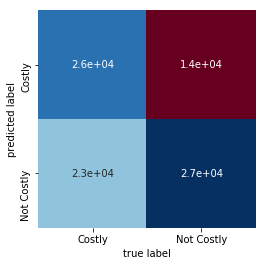

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['Costly', 'Not Costly'], yticklabels=['Costly', 'Not Costly'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
confusion_matrix(y_test, predictions)

#TRUE POSITIVES LOWER RIGHT
#TRUE NEGATIVES UPPER LEFT 12038
#FALSE POSITIVE UPPER RIGHT
#FALSE NEGATIVE LOWER LEFT

array([[25542, 13538],
       [23151, 27278]], dtype=int64)

# K Nearest Neighbors Classifiers


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neighbors = KNeighborsClassifier(n_neighbors=5)

neighbors.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Play with parameters for KNN, try out n_neighbors = 3 instead

In [ ]:
neighbors.predict(X_test)

In [ ]:
#Do a train test split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#split dataset into train and test data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
# Create KNN classifier
#knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
#knn.fit(X_train,y_train)

#https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
#chicago.shape

# Create KNN classifier
#knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
#knn.fit(X_train,y_train)

#show first 5 model predictions on the test data
#knn.predict(X_test)[0:5]

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

In [ ]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print(np.mean(cv_scores))

# Decision Tree

## Build a baseline model decision tree to compare scores

In [ ]:
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

In [ ]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=6,
    max_depth=5,
    random_state = 99
)


decision_tree.fit(X_train,y_train)



In [ ]:
#decision_tree.predict([[60,9,1,1,0,0,0,0,1]])

#decision_tree.predict([[60,9,1,1,0,0,0,0,0]])



In [ ]:
predictions = decision_tree.predict(X_test)

In [ ]:

print('Accuracy score:' , accuracy_score(y_test, predictions))
print('Precision score:' , precision_score(y_test, predictions))
print('Recall score:' , recall_score(y_test, predictions))

In [ ]:
decision_tree.classes_

In [ ]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, 
    out_file=None,
    feature_names = X.columns,    
    class_names= ["Not Costly","Costly"],
    filled=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Random Forest 

In [ ]:
chicago